In [9]:
import snntorch as snn
import torch
from torchvision import datasets, transforms
from snntorch import utils
from torch.utils.data import DataLoader
from snntorch import utils
from snntorch import spikegen
import matplotlib.pyplot as plt
import snntorch.spikeplot as splt
from IPython.display import HTML

plt.rcParams['animation.ffmpeg_path'] = "C:\\Users\\Spino.shop\\Downloads\\ffmpeg.exe"

In [10]:
# Get the dataset, we will use MNIST
batchSize = 128
path = "./Data"
nClasses = 10

# Transform the dataset using torch 
transform = transforms.Compose([transforms.Resize((32, 32)),
            transforms.Grayscale(),
            transforms.ToTensor(),
            transforms.Normalize((0,), (1,))])

# Download the dataset (train)
MNIST_train = datasets.MNIST(path, train=True, download=True, transform=transform)

# Get a subset of the data
subset = 10
MNIST_train = utils.data_subset(MNIST_train, subset)

# Make a dataloader for the training dataset
trainLoader = DataLoader(MNIST_train, batch_size=batchSize, shuffle=False)

In [11]:
# Temporal Dynamics
num_steps = 100

# Create a vector of elements, resembling the probability in a Bernoulli trial
raw_vector = torch.ones(num_steps)*0.7

# Conduct a Bernoulli trial
rate_coded_vector = torch.bernoulli(raw_vector)
print(f"Converted vector: {rate_coded_vector}")

print(f"The output is spiking {rate_coded_vector.sum()*100/len(rate_coded_vector):.2f}% of the time.")

# As you can see, as the number of time steps increases, the probability of the 
# output being spiking converges to the number of ones in "raw_vector".

Converted vector: tensor([0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
        1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
        0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
        1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0.,
        1., 0., 0., 1., 1., 1., 1., 1., 1., 0.])
The output is spiking 64.00% of the time.


Batch shape: torch.Size([128, 1, 32, 32])
torch.Size([100, 128, 1, 32, 32])
torch.Size([100, 32, 32])


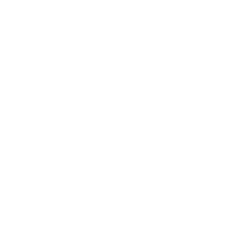

In [12]:
for batch_data, batch_labels in trainLoader:
    print(f"Batch shape: {batch_data.shape}")
    spikeData = spikegen.rate(batch_data, num_steps)
    print(spikeData.shape)
    break

spike_data_sample = spikeData[:, 1, 0]
print(spike_data_sample.size())
fig, ax = plt.subplots()
anim = splt.animator(spike_data_sample, fig, ax)
HTML(anim.to_html5_video())

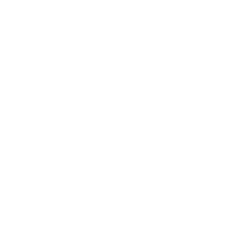

In [13]:
spike_data = spikegen.rate(batch_data, num_steps=num_steps, gain=0.25)

spike_data_sample2 = spike_data[:, 0, 0]
fig, ax = plt.subplots()
anim = splt.animator(spike_data_sample2, fig, ax)
HTML(anim.to_html5_video())

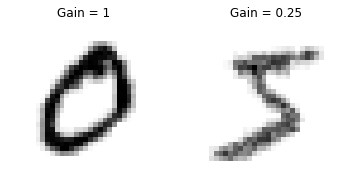

In [14]:
plt.figure(facecolor="w")
plt.subplot(1,2,1)
plt.imshow(spike_data_sample.mean(axis=0).reshape((32,-1)).cpu(), cmap='binary')
plt.axis('off')
plt.title('Gain = 1')

plt.subplot(1,2,2)
plt.imshow(spike_data_sample2.mean(axis=0).reshape((32,-1)).cpu(), cmap='binary')
plt.axis('off')
plt.title('Gain = 0.25')

plt.show()

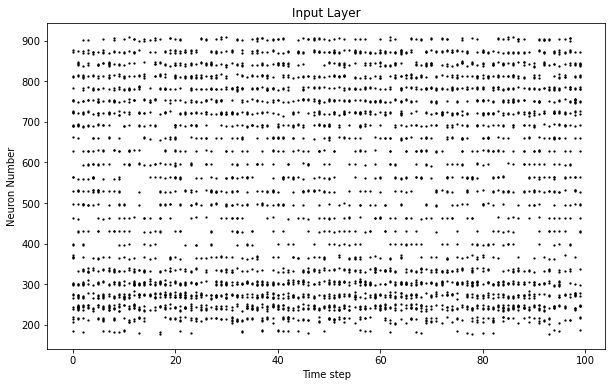

In [15]:
spikeData_sample_2 = spike_data_sample2.reshape((num_steps, -1))
fig = plt.figure(facecolor="w", figsize=(10,6))
ax = fig.add_subplot(111)
splt.raster(spikeData_sample_2, ax, s = 1.5, c = "black")
plt.title("Input Layer")
plt.xlabel("Time step")
plt.ylabel("Neuron Number")
plt.show()

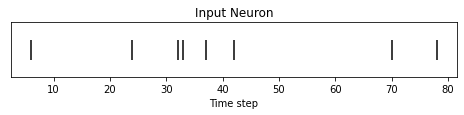

In [16]:
idx = 210  # index into 210th neuron

fig = plt.figure(facecolor="w", figsize=(8, 1))
ax = fig.add_subplot(111)

splt.raster(spikeData_sample_2.reshape(num_steps, -1)[:, idx].unsqueeze(1), ax, s=400, c="black", marker="|")

plt.title("Input Neuron")
plt.xlabel("Time step")
plt.yticks([])
plt.show()

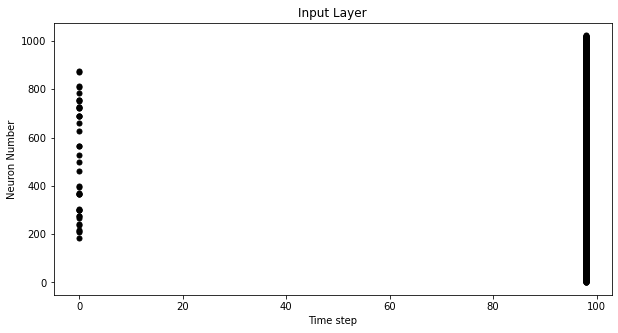

In [27]:
# Latency coding


spike_data = spikegen.latency(spike_data_sample2, num_steps=100, tau = 5, linear = True, threshold=0.01, normalize= True)

fig = plt.figure(facecolor="w", figsize=(10, 5))
ax = fig.add_subplot(111)
splt.raster(spike_data[:, 0].view(num_steps, -1), ax, s=25, c="black")

plt.title("Input Layer")
plt.xlabel("Time step")
plt.ylabel("Neuron Number")
plt.show()


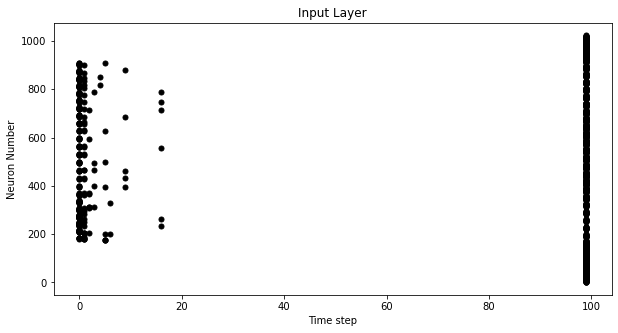

In [42]:
spike_data = spikegen.latency(batch_data, num_steps=100, tau=90, threshold=0.01, 
                              clip=False, normalize=True, linear=False)

fig = plt.figure(facecolor="w", figsize=(10, 5))
ax = fig.add_subplot(111)
splt.raster(spike_data[:, 0].view(num_steps, -1), ax, s=25, c="black")

plt.title("Input Layer")
plt.xlabel("Time step")
plt.ylabel("Neuron Number")
plt.show()
